## PRE-PROCESSING THE DATA





In [ ]:
#Import some basic libraries
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

#Set seed and load data
np.random.seed(42)
flights = pd.read_csv('VA and 2010.csv',low_memory=False)

In [ ]:
#read_csv occasionally adds in several "Unnamed" columns which we don't want
flights = flights.loc[:, ~flights.columns.str.contains('^Unnamed')]

#Eliminate empty cells in the dataset
flights = flights.drop(flights.index[66661:])

#Unimportant features
flights = flights.drop(["OriginAirportID","OriginCityMarketID","DestAirportID",
                        "DestCityMarketID","DestAirportSeqID","DestWac",
                        "CRSDepTime","DepTime","DepartureDelayGroups",
                        "CRSArrTime","ArrTime","ArrDelay","OriginStateFips",
                        "OriginStateFips","ArrivalDelayGroups","OriginState",
                        "DestState", "ArrDelayMinutes", "TaxiOut",
                        "TaxiIn", "WheelsOff", "WheelsOn",
                        "DestStateFips", "DepDelay", "ArrDel15",
                        "ArrTimeBlk"], axis=1)


#Drops the lines that don't have all the data points (Labels like 'Cancelled' wouldn't have several crucial features)
flights.dropna(inplace = True)

In [ ]:
flights.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginCityName', 'OriginStateName',
       'OriginWac', 'Dest', 'DestCityName', 'DestStateName', 'DepDelayMinutes',
       'DepDel15', 'DepTimeBlk', 'Cancelled'],
      dtype='object')

In [ ]:
flights.head(9)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginWac,Dest,DestCityName,DestStateName,DepDelayMinutes,DepDel15,DepTimeBlk,Cancelled
0,2006.0,1.0,1.0,28.0,6.0,1/28/2006,UA,LAX,"Los Angeles, CA",California,91.0,IAD,"Washington, DC",Virginia,0.0,0.0,1500-1559,0.0
1,1997.0,1.0,1.0,7.0,2.0,1/7/1997,US,DCA,"Washington, DC",Virginia,38.0,BOS,"Boston, MA",Massachusetts,0.0,0.0,1700-1759,0.0
2,2019.0,1.0,3.0,27.0,3.0,3/27/2019,OH,CHO,"Charlottesville, VA",Virginia,38.0,CLT,"Charlotte, NC",North Carolina,0.0,0.0,1600-1659,0.0
3,1993.0,4.0,12.0,28.0,2.0,12/28/1993,NW,DCA,"Washington, DC",Virginia,38.0,DTW,"Detroit, MI",Michigan,0.0,0.0,0900-0959,0.0
5,1993.0,1.0,3.0,9.0,2.0,3/9/1993,US,DCA,"Washington, DC",Virginia,38.0,FLL,"Fort Lauderdale, FL",Florida,0.0,0.0,1800-1859,0.0
6,1992.0,1.0,1.0,3.0,5.0,1/3/1992,US,RIC,"Richmond, VA",Virginia,38.0,CLT,"Charlotte, NC",North Carolina,0.0,0.0,1500-1559,0.0
7,2012.0,4.0,12.0,5.0,3.0,12/5/2012,WN,MDW,"Chicago, IL",Illinois,41.0,ORF,"Norfolk, VA",Virginia,0.0,0.0,1300-1359,0.0
8,1992.0,1.0,3.0,6.0,5.0,3/6/1992,US,RIC,"Richmond, VA",Virginia,38.0,EWR,"Newark, NJ",New Jersey,0.0,0.0,1000-1059,0.0
9,2006.0,3.0,7.0,12.0,3.0,7/12/2006,NW,DTW,"Detroit, MI",Michigan,43.0,DCA,"Washington, DC",Virginia,0.0,0.0,1300-1359,0.0


In [ ]:
flights.describe()

,Year,Quarter,Month,DayofMonth,DayOfWeek,OriginWac,DepDelayMinutes,DepDel15,Cancelled
count,64899.000000,64899.000000,64899.000000,64899.000000,64899.000000,64899.000000,64899.000000,64899.000000,64899.000000
mean,2003.972912,2.503629,6.509638,15.705419,3.917179,39.715034,10.242746,0.153593,0.000262
std,9.314219,1.119655,3.443903,8.792808,1.991669,15.654070,34.002859,0.360560,0.016183
min,1987.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000
25%,1996.000000,2.000000,4.000000,8.000000,2.000000,36.000000,0.000000,0.000000,0.000000
50%,2004.000000,3.000000,7.000000,16.000000,4.000000,38.000000,0.000000,0.000000,0.000000
75%,2011.000000,4.000000,10.000000,23.000000,6.000000,38.000000,5.000000,0.000000,0.000000
max,2020.000000,4.000000,12.000000,31.000000,7.000000,93.000000,1878.000000,1.000000,1.000000


In [ ]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64899 entries, 0 to 66660
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               64899 non-null  float64
 1   Quarter            64899 non-null  float64
 2   Month              64899 non-null  float64
 3   DayofMonth         64899 non-null  float64
 4   DayOfWeek          64899 non-null  float64
 5   FlightDate         64899 non-null  object 
 6   Reporting_Airline  64899 non-null  object 
 7   Origin             64899 non-null  object 
 8   OriginCityName     64899 non-null  object 
 9   OriginStateName    64899 non-null  object 
 10  OriginWac          64899 non-null  float64
 11  Dest               64899 non-null  object 
 12  DestCityName       64899 non-null  object 
 13  DestStateName      64899 non-null  object 
 14  DepDelayMinutes    64899 non-null  float64
 15  DepDel15           64899 non-null  float64
 16  DepTimeBlk         648

---
##  DATA DISCOVERY, CLEANING, AND SCALING 


In [ ]:
#Adds in a feature that says if the flight lands on a holiday
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
flights["FlightDate"] = pd.to_datetime(flights["FlightDate"])
holidays = cal.holidays(start=flights["FlightDate"].min(), end=flights["FlightDate"].max())
flights["isHoliday"] = flights["FlightDate"].isin(holidays)
flights.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginWac,Dest,DestCityName,DestStateName,DepDelayMinutes,DepDel15,DepTimeBlk,Cancelled,isHoliday
0,2006.0,1.0,1.0,28.0,6.0,2006-01-28,UA,LAX,"Los Angeles, CA",California,91.0,IAD,"Washington, DC",Virginia,0.0,0.0,1500-1559,0.0,False
1,1997.0,1.0,1.0,7.0,2.0,1997-01-07,US,DCA,"Washington, DC",Virginia,38.0,BOS,"Boston, MA",Massachusetts,0.0,0.0,1700-1759,0.0,False
2,2019.0,1.0,3.0,27.0,3.0,2019-03-27,OH,CHO,"Charlottesville, VA",Virginia,38.0,CLT,"Charlotte, NC",North Carolina,0.0,0.0,1600-1659,0.0,False
3,1993.0,4.0,12.0,28.0,2.0,1993-12-28,NW,DCA,"Washington, DC",Virginia,38.0,DTW,"Detroit, MI",Michigan,0.0,0.0,0900-0959,0.0,False
5,1993.0,1.0,3.0,9.0,2.0,1993-03-09,US,DCA,"Washington, DC",Virginia,38.0,FLL,"Fort Lauderdale, FL",Florida,0.0,0.0,1800-1859,0.0,False


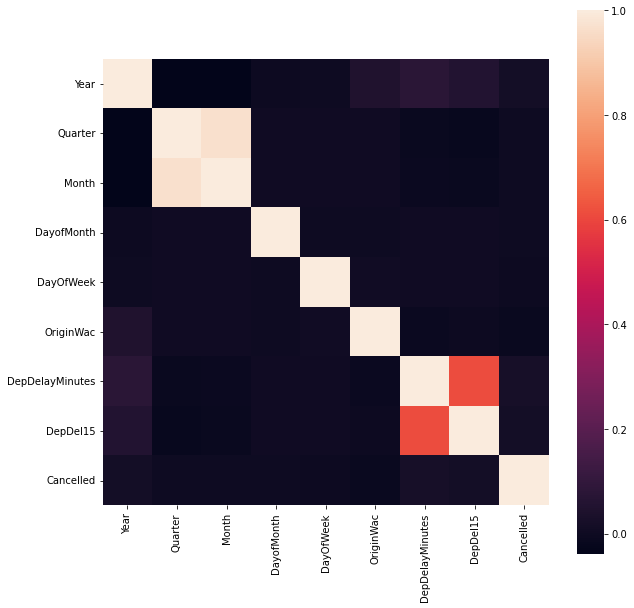

In [ ]:
#Correlation Matrix
import seaborn
attributes = flights.select_dtypes(include=[np.number])
corr_matrix = attributes.corr()
plt.subplots(figsize=(10, 10))
seaborn.heatmap(corr_matrix, vmax=1, square=True);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe95f7e4b50>,
      dtype=object)

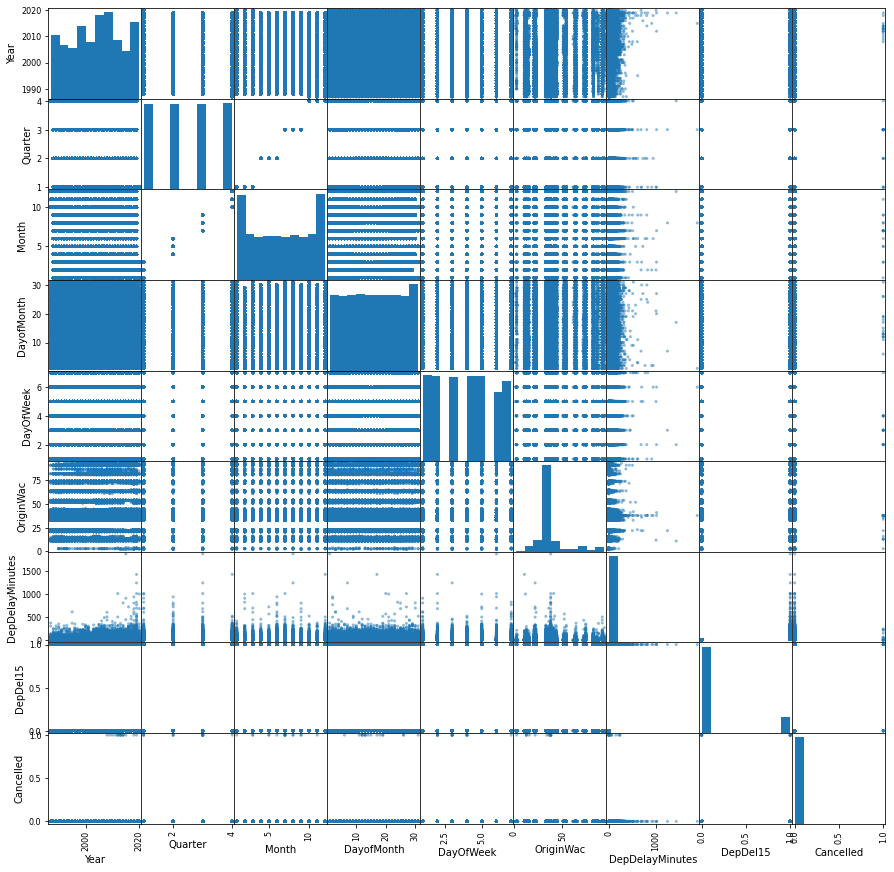

In [ ]:
#Scatter Matrix
from pandas.plotting import scatter_matrix
scatter_matrix(attributes, figsize=(15,15))

---
##  REGRESSION & ENSEMBLE


In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

flights_features = flights.copy()
flights_features = flights_features.drop("DepDelayMinutes", axis=1) 
 
flights_labels = flights.copy()
flights_labels = flights["DepDelayMinutes"]
 
X_temp, X_test, y_temp, y_test = train_test_split(flights_features, flights_labels, test_size=0.15)
 
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=len(X_test))
 
print("Num training:", X_train.shape)
print("Num validation:", X_val.shape)
print("Num testing:", X_test.shape)
 
from sklearn.compose import ColumnTransformer
numerical = X_train.select_dtypes(include=[np.number])
categorical = X_train.select_dtypes(exclude=[np.number])

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median",missing_values = np.nan)),
    ('std_scaler', StandardScaler()),
])

full_pipeline = ColumnTransformer([
        ("num", numerical_pipeline, list(numerical)),
        ("cat", OneHotEncoder(handle_unknown="ignore"), list(categorical)),
    ])

X_train_prepared = full_pipeline.fit_transform(X_train)
X_val_prepared = full_pipeline.transform(X_val)
X_test_prepared = full_pipeline.transform(X_test)

Num training: (45429, 18)
Num validation: (9735, 18)
Num testing: (9735, 18)


In [66]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
 
lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

lin_reg_scores = cross_val_score(lin_reg, X_test_prepared, y_test,
                                scoring="neg_mean_squared_error", cv=10)
lin_reg_rmse_scores = np.sqrt(-lin_reg_scores)
print("===============Linear Regression Scores================")
display_scores(lin_reg_rmse_scores)
flights_predictions = lin_reg.predict(X_test_prepared)
lin_mse = mean_squared_error(y_test, flights_predictions)
lin_rmse = np.sqrt(lin_mse)
print("lin_rmse=",lin_rmse)

from sklearn.ensemble import GradientBoostingRegressor
 
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='squared_error')
gbr.fit(X_train_prepared, y_train)
 
from sklearn.model_selection import cross_val_score
import numpy as np
 
gbr_scores = cross_val_score(gbr, X_test_prepared, y_test,
                                scoring="neg_mean_squared_error", cv=10)
gbr_rmse_scores = np.sqrt(-gbr_scores)
print("===============Gradient Boosting Regressor Scores================")
display_scores(gbr_rmse_scores)
flights_predictions = gbr.predict(X_test_prepared)
gbr_mse = mean_squared_error(y_test, flights_predictions)
gbr_rmse = np.sqrt(gbr_mse)
print("gbr_rmse=",gbr_rmse)



===============Linear Regression Scores================
Scores: [31.75535553 22.73299719 26.35143658 26.82770082 27.36587365 23.90594727
 27.16254818 40.19818871 63.62497042 33.48420839]
Mean: 32.340922672788096
Standard deviation: 11.503806065678832
lin_rmse= 31.79406791255311
===============Gradient Boosting Regressor Scores================
Scores: [30.27118645 18.87173994 21.45909544 18.72999043 22.74949778 18.6205587
 23.54423292 23.00047933 60.93273014 28.77150775]
Mean: 26.69510188785864
Standard deviation: 12.02382234273267
gbr_rmse= 29.065799120155994


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'learning_rate': [0.1,0.01], 'n_estimators': [600,800], 'max_depth': [2]},
  ]

gbr = GradientBoostingRegressor(random_state=0, loss='squared_error')

grid_search = GridSearchCV(gbr, param_grid, cv=2,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           verbose=5)
grid_search.fit(X_train_prepared, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END learning_rate=0.1, max_depth=2, n_estimators=600;, score=(train=-530.590, test=-775.316) total time=  13.3s
[CV 2/2] END learning_rate=0.1, max_depth=2, n_estimators=600;, score=(train=-615.817, test=-660.394) total time=  16.2s
[CV 1/2] END learning_rate=0.1, max_depth=2, n_estimators=800;, score=(train=-513.986, test=-790.321) total time=  17.6s
[CV 2/2] END learning_rate=0.1, max_depth=2, n_estimators=800;, score=(train=-589.566, test=-664.067) total time=  18.4s
[CV 1/2] END learning_rate=0.01, max_depth=2, n_estimators=600;, score=(train=-623.367, test=-748.241) total time=  12.6s
[CV 2/2] END learning_rate=0.01, max_depth=2, n_estimators=600;, score=(train=-723.728, test=-646.635) total time=  12.6s
[CV 1/2] END learning_rate=0.01, max_depth=2, n_estimators=800;, score=(train=-619.835, test=-748.394) total time=  16.9s
[CV 2/2] END learning_rate=0.01, max_depth=2, n_estimators=800;, score=(train=-716.352, tes

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(random_state=0),
             param_grid=[{'learning_rate': [0.1, 0.01], 'max_depth': [2],
                          'n_estimators': [600, 800]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=5)

In [ ]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("Final RMSE:", final_rmse)
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, final_predictions)
lin_mae
print("Final MAE:", lin_mae)

Final RMSE: 28.557041961485268
Final MAE: 7.915640852098598


In [67]:
#from xgbooost.sklearn import XGBRegressor
import xgboost as xg
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'learning_rate': [0.1], 'n_estimators': [700, 800, 900, 1000], 'max_depth': [2]},
  ]


xgb_r = xg.XGBRegressor(objective = "reg:linear", seed=0)

grid_search = GridSearchCV(xgb_r, param_grid, cv=2,
                           return_train_score=True,
                           verbose=5)
grid_search.fit(X_train_prepared, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[20:16:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/2] END learning_rate=0.1, max_depth=2, n_estimators=700;, score=(train=0.701, test=0.247) total time=  12.1s
[20:17:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/2] END learning_rate=0.1, max_depth=2, n_estimators=700;, score=(train=0.682, test=0.283) total time=   9.9s
[20:17:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/2] END learning_rate=0.1, max_depth=2, n_estimators=800;, score=(train=0.711, test=0.240) total time=  12.4s
[20:17:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/2] END learning_rate=0.1, max_depth=2, n_estimators=800;, score=(train=0.693, test

GridSearchCV(cv=2, estimator=XGBRegressor(seed=0),
             param_grid=[{'learning_rate': [0.1], 'max_depth': [2],
                          'n_estimators': [700, 800, 900, 1000]}],
             return_train_score=True, verbose=5)

In [ ]:
pred = grid_search.predict(X_test_prepared)

In [ ]:
XGB_mse = mean_squared_error(y_test, pred)
XGB_rmse = np.sqrt(XGB_mse)
print("XGB_rmse=",XGB_rmse)

XGB_rmse= 29.277869168425774


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

def prepare_classifying_data(classifying_label, dropped_features): 
  flights_features = flights.copy()
  flights_features = flights_features.drop(classifying_label, axis=1) 
  if dropped_features != None:
    for feature in dropped_features:
      flights_features = flights_features.drop(feature, axis=1)

  flights_labels = flights[classifying_label]
  
  X_temp, X_test, y_temp, y_test = train_test_split(flights_features, flights_labels, test_size=0.15)
  
  X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=len(X_test))
  
  print("Num training:", X_train.shape)
  print("Num validation:", X_val.shape)
  print("Num testing:", X_test.shape)

  numerical = X_train.select_dtypes(include=[np.number])
  categorical = X_train.select_dtypes(exclude=[np.number])
  if "Cancelled" != classifying_label:
    categorical["Cancelled"] = numerical["Cancelled"]
    numerical = numerical.drop(["Cancelled"], axis=1)
  if "DepDel15" != classifying_label and ("DepDel15" not in dropped_features):
    categorical["DepDel15"] = numerical["DepDel15"]
    numerical = numerical.drop(["DepDel15"], axis=1)

  numerical_pipeline = Pipeline([
      ('imputer', SimpleImputer(strategy="median", missing_values = np.nan)),
      ('std_scaler', MinMaxScaler()),
  ])
  
  full_pipeline = ColumnTransformer([
          ("num", numerical_pipeline, list(numerical)),
          ("cat", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), list(categorical)),
      ])

  X_train_prepared = full_pipeline.fit_transform(X_train)
  X_val_prepared = full_pipeline.transform(X_val)
  X_test_prepared = full_pipeline.transform(X_test)

  return [X_train_prepared, X_test_prepared, y_train, y_test], numerical, categorical

In [ ]:
#This cell implements ensemble learning from Colab 07
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def Ensemble(data):
  X_train_prepared = data[0]
  X_test_prepared = data[1]
  y_train = data[2]
  y_test = data[3]

  iters = 1000
  rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
  svm_clf = SVC(gamma="scale", random_state=42)
  log_clf = LogisticRegression(random_state=42,max_iter=iters, multi_class="multinomial")

  voting_clf = VotingClassifier(
          estimators=[ ('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
          voting='hard')

  rnd_clf.fit(X_train_prepared, y_train)
  y_pred_rnd = rnd_clf.predict(X_test_prepared)
  print("RandomForrestClassifier Accurracy: ", accuracy_score(y_test, y_pred_rnd))

  svm_clf.fit(X_train_prepared, y_train)
  y_pred_svm = svm_clf.predict(X_test_prepared)
  print("SVC Accurracy: ", accuracy_score(y_test, y_pred_svm))

  log_clf.fit(X_train_prepared, y_train)
  y_pred_log = log_clf.predict(X_test_prepared)
  print("Logistic Regression Accurracy: ", accuracy_score(y_test, y_pred_log))

  voting_clf.fit(X_train_prepared, y_train)
  y_pred_voting = voting_clf.predict(X_test_prepared)
  print("Ensemble Accuracy: ", accuracy_score(y_test, y_pred_voting))

  return rnd_clf, svm_clf, log_clf, voting_clf

def findCorrelations(classifier, feature, dropped_features):
  cat_encoder = full_pipeline.named_transformers_["cat"]
  cat_one_hot_attribs = list(cat_encoder.categories_[0])
  attributes = flights.loc[:, flights.columns != feature]
  if dropped_features != None:
    for feature in dropped_features:
      attributes = attributes.drop(feature, axis=1)
  return sorted(zip(classifier.feature_importances_, attributes), reverse=True)

#This cell implements ensemble learning from Colab 07
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def Ensemble(data):
  X_train_prepared = data[0]
  X_test_prepared = data[1]
  y_train = data[2]
  y_test = data[3]

  iters = 1000
  rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
  svm_clf = SVC(gamma="scale", random_state=42)
  log_clf = LogisticRegression(random_state=42,max_iter=iters, multi_class="multinomial")

  voting_clf = VotingClassifier(
          estimators=[ ('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
          voting='hard')

  rnd_clf.fit(X_train_prepared, y_train)
  y_pred = rnd_clf.predict(X_test_prepared)
  print("RandomForrestClassifier Accurracy: ", accuracy_score(y_test, y_pred))

  svm_clf.fit(X_train_prepared, y_train)
  y_pred = svm_clf.predict(X_test_prepared)
  print("SVC Accurracy: ", accuracy_score(y_test, y_pred))

  log_clf.fit(X_train_prepared, y_train)
  y_pred = log_clf.predict(X_test_prepared)
  print("Logistic Regression Accurracy: ", accuracy_score(y_test, y_pred))

  voting_clf.fit(X_train_prepared, y_train)
  y_pred = voting_clf.predict(X_test_prepared)
  print("Ensemble Accuracy: ", accuracy_score(y_test, y_pred))

  return rnd_clf, svm_clf, log_clf, voting_clf

def findCorrelations(classifier, feature, dropped_features):
  cat_encoder = full_pipeline.named_transformers_["cat"]
  cat_one_hot_attribs = list(cat_encoder.categories_[0])
  attributes = flights.loc[:, flights.columns != feature]
  if dropped_features != None:
    for feature in dropped_features:
      attributes = attributes.drop(feature, axis=1)
  return sorted(zip(classifier.feature_importances_, attributes), reverse=True)

## RESULTS

In [ ]:
#Ensemble for predicting if there will be at least a 15 minute delay
DepDel15_data, numerical, categorical = prepare_classifying_data("DepDel15", ["DepDelayMinutes"])
rnd_clf, svm_clf, log_clf, voting_clf = Ensemble(DepDel15_data)

Num training: (45429, 17)
Num validation: (9735, 17)
Num testing: (9735, 17)
RandomForrestClassifier Accurracy:  0.8352336928608115
SVC Accurracy:  0.838623523369286
Logistic Regression Accurracy:  0.838623523369286
Ensemble Accuracy:  0.838623523369286


In [ ]:
findCorrelations(rnd_clf, "DepDel15", dropped_features=["DepDelayMinutes"])

[(0.16332528783192618, 'Reporting_Airline'),
 (0.12700308986301292, 'DayofMonth'),
 (0.10176225636208133, 'DepTimeBlk'),
 (0.08115499337626188, 'Year'),
 (0.07494931533512103, 'DayOfWeek'),
 (0.07212940386919052, 'Month'),
 (0.05953507524247225, 'Dest'),
 (0.05845790434250001, 'Origin'),
 (0.04907356912594798, 'OriginCityName'),
 (0.04753597621203691, 'DestCityName'),
 (0.04010986265399283, 'OriginStateName'),
 (0.0355631687110289, 'DestStateName'),
 (0.028755730825249456, 'FlightDate'),
 (0.028028414578024366, 'Quarter'),
 (0.02667559385352268, 'OriginWac'),
 (0.0056075853872194, 'Cancelled'),
 (0.0003327724304114627, 'isHoliday')]

In [69]:
#Ensemble for predicting if there will be a cancellation
Cancelled_data, numerical, categorical = prepare_classifying_data("Cancelled", dropped_features=["DepDel15", "DepDelayMinutes"])
rnd_clf, svm_clf, log_clf, voting_clf = Ensemble(Cancelled_data)

Num training: (45429, 16)
Num validation: (9735, 16)
Num testing: (9735, 16)
RandomForrestClassifier Accurracy:  0.9998972778633796
SVC Accurracy:  0.9998972778633796


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accurracy:  0.9998972778633796


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble Accuracy:  0.9998972778633796


In [70]:
findCorrelations(rnd_clf, "Cancelled", dropped_features=["DepDel15", "DepDelayMinutes"])

[(0.25766919401541416, 'Reporting_Airline'),
 (0.11263370512830179, 'DayofMonth'),
 (0.0921891220673642, 'DepTimeBlk'),
 (0.07666534916661183, 'Year'),
 (0.07284306976026372, 'Month'),
 (0.06949546240685002, 'DayOfWeek'),
 (0.057470829424311407, 'Origin'),
 (0.050282076083460324, 'OriginCityName'),
 (0.048834733490486275, 'Dest'),
 (0.03932692922714911, 'OriginStateName'),
 (0.03692294613221226, 'Quarter'),
 (0.026194100508792523, 'DestCityName'),
 (0.02489470220823279, 'FlightDate'),
 (0.018220667503512287, 'DestStateName'),
 (0.01565823482481706, 'OriginWac'),
 (0.0006988780522203806, 'isHoliday')]